<a href="https://colab.research.google.com/github/bkkaggle/pytorch-CycleGAN-and-pix2pix/blob/master/pix2pix.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Install

In [1]:
# this mounts your Google Drive to the Colab VM.
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

# enter the foldername in your Drive where you have saved the unzipped
# assignment folder, e.g. 'cs231n/assignments/assignment3/'
FOLDERNAME = 'CS231N/'
assert FOLDERNAME is not None, "[!] Enter the foldername."

# now that we've mounted your Drive, this ensures that
# the Python interpreter of the Colab VM can load
# python files from within it.
import sys
sys.path.append('/content/drive/My Drive/{}'.format(FOLDERNAME))

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [2]:
# !git clone https://github.com/junyanz/pytorch-CycleGAN-and-pix2pix
!git clone https://github.com/michaele77/CS231N-pytorch

Cloning into 'CS231N-pytorch'...
remote: Enumerating objects: 12256, done.
remote: Total 12256 (delta 0), reused 0 (delta 0), pack-reused 12256
Receiving objects: 100% (12256/12256), 1.08 GiB | 16.17 MiB/s, done.
Resolving deltas: 100% (1466/1466), done.
Checking out files: 100% (10455/10455), done.


In [0]:

import os
# os.chdir('pytorch-CycleGAN-and-pix2pix/')
os.chdir('CS231N-pytorch/')

In [4]:
!pip install -r requirements.txt

     |████████████████████████████████| 686kB 10.9MB/s 
     |████████████████████████████████| 204kB 45.7MB/s 
  Created wheel for visdom: filename=visdom-0.1.8.9-cp36-none-any.whl size=655250 sha256=be74d209c218a43527a749193ccd053f7083a3283cbd9b48eed1dd17673941bc
  Stored in directory: /root/.cache/pip/wheels/70/19/a7/6d589ed967f4dfefd33bc166d081257bd4ed0cb618dccfd62a
  Created wheel for torchfile: filename=torchfile-0.1.0-cp36-none-any.whl size=5712 sha256=90881fc6046f03027f6f45568b6baf95778be92a7d7ef44967ca5090f27f8e48
  Stored in directory: /root/.cache/pip/wheels/b1/c3/d6/9a1cc8f3a99a0fc1124cae20153f36af59a6e683daca0a0814
Successfully built visdom torchfile


# Datasets

Download one of the official datasets with:

-   `bash ./datasets/download_pix2pix_dataset.sh [cityscapes, night2day, edges2handbags, edges2shoes, facades, maps]`

Or use your own dataset by creating the appropriate folders and adding in the images. Follow the instructions [here](https://github.com/junyanz/pytorch-CycleGAN-and-pix2pix/blob/master/docs/datasets.md#pix2pix-datasets).

In [0]:
# !bash ./datasets/download_pix2pix_dataset.sh facades

# Pretrained models

Download one of the official pretrained models with:

-   `bash ./scripts/download_pix2pix_model.sh [edges2shoes, sat2map, map2sat, facades_label2photo, and day2night]`

Or add your own pretrained model to `./checkpoints/{NAME}_pretrained/latest_net_G.pt`

In [0]:
# !bash ./scripts/download_pix2pix_model.sh facades_label2photo

# Training

-   `python train.py --dataroot ./datasets/facades --name facades_pix2pix --model pix2pix --direction BtoA`

Change the `--dataroot` and `--name` to your own dataset's path and model's name. Use `--gpu_ids 0,1,..` to train on multiple GPUs and `--batch_size` to change the batch size. Add `--direction BtoA` if you want to train a model to transfrom from class B to A.

In [7]:
#Run the combination script
!python datasets/combine_A_and_B.py --fold_A path/to/data/A --fold_B path/to/data/B --fold_AB path/to/data

[fold_A] =  path/to/data/A
[fold_B] =  path/to/data/B
[fold_AB] =  path/to/data
[num_imgs] =  1000000
[use_AB] =  False
split = train, use 4200/4200 images
split = train, number of images = 4200
split = val, use 790/790 images
split = val, number of images = 790
split = test, use 200/200 images
split = test, number of images = 200


**We will now be doing the main training loop, see below**

In [8]:
#Test directories
import shutil 
!ls

# shutil.copytree('ershov_lossFolder_1', '/content/drive/My Drive/CS231N/' + 'trash')


 CycleGAN.ipynb   "Ershov's ReadMe.txt"   path		     test.py
 data		   imgs			  pix2pix.ipynb      train.py
 datasets	   LICENSE		  README.md	     util
 docs		   models		  requirements.txt
 environment.yml   options		  scripts


In [24]:
!ls
fileSrc = 'test0_nom'
flag = True
initDirNum = 10
dirCntr = 0
dirNum = initDirNum - dirCntr
while flag and dirNum >=0:
  try:
    c = dirNum
    lossFileSrc = 'ershov_lossFolder_' + str(dirNum)
    shutil.copytree(lossFileSrc, '/content/drive/My Drive/CS231N/' + lossFileSrc)
    flag = False
  except:
    print('Directory ' + str(dirNum) + ' not occupied, moving down')
    dirCntr += 1
  dirNum = initDirNum - dirCntr

shutil.copytree('checkpoints/' + fileSrc, '/content/drive/My Drive/CS231N/' + fileSrc)

 checkpoints	  docs			 imgs	   path		      scripts
 CycleGAN.ipynb   environment.yml	 LICENSE   pix2pix.ipynb      test.py
 data		  ershov_lossFolder_0	 models    README.md	      train.py
 datasets	 "Ershov's ReadMe.txt"	 options   requirements.txt   util
10
Directory 10 not occupied, moving down
9
Directory 9 not occupied, moving down
8
Directory 8 not occupied, moving down
7
Directory 7 not occupied, moving down
6
6


FileExistsError: ignored

In [32]:
# !rm -r ershov_lossFolder_6
!ls

curDirName = '3'
fileSrc = 'ershov_lossFolder_' + curDirName
shutil.copytree(fileSrc, '/content/drive/My Drive/CS231N/' + fileSrc)


 checkpoints	   ershov_lossFolder_0	  LICENSE	  requirements.txt
 CycleGAN.ipynb    ershov_lossFolder_1	  models	  scripts
 data		   ershov_lossFolder_2	  options	  test.py
 datasets	   ershov_lossFolder_3	  path		  train.py
 docs		  "Ershov's ReadMe.txt"   pix2pix.ipynb   util
 environment.yml   imgs			  README.md


'/content/drive/My Drive/CS231N/ershov_lossFolder_3'

In [35]:
import os
os.popen('ls').read()

"checkpoints\nCycleGAN.ipynb\ndata\ndatasets\ndocs\nenvironment.yml\nershov_lossFolder_0\nershov_lossFolder_1\nershov_lossFolder_2\nershov_lossFolder_3\nershov_lossFolder_4\nErshov's ReadMe.txt\nimgs\nLICENSE\nmodels\noptions\npath\npix2pix.ipynb\nREADME.md\nrequirements.txt\nscripts\ntest.py\ntrain.py\nutil\n"

In [36]:
####THIS IS THE MAIN TRAINING LOOP####
#First, let's train for 70 epochs, 35 main and 35 decay
#Everything default, print every 100
#Use the WGAN loss model
import shutil 
import os

# !python train.py --dataroot ./path/to/data/ --name test0_WGAN_1 --model pix2pix --batch_size=8 --direction AtoB --n_epochs=25 --n_epochs_decay=25 --print_freq=100 --gan_mode=wgangp

# dirNum = 2
# lossFileSrc = 'ershov_lossFolder_' + str(dirNum)
# shutil.copytree(lossFileSrc, '/content/drive/My Drive/CS231N/' + lossFileSrc)
# fileSrc = 'test0_WGAN_1'
# shutil.copytree('checkpoints/' + fileSrc, '/content/drive/My Drive/CS231N/' + fileSrc)


#Now, let's train for 70 epochs, 35 main and 35 decay
#Everything default, print every 100
#ITER 0
# !python train.py --dataroot ./path/to/data/ --name test0_nom --model pix2pix --batch_size=8 --direction AtoB --n_epochs=25 --n_epochs_decay=25 --print_freq=100 --gan_mode=lsgan --continue_train --epoch_count=28

# fileSrc = 'test0_nom'
# modifier = '_iter1'
# flag = True
# initDirNum = 10
# dirCntr = 0
# dirNum = initDirNum - dirCntr
# while flag and dirNum >=0:
#   try:
#     c = dirNum
#     lossFileSrc = 'ershov_lossFolder_' + str(dirNum)
#     shutil.copytree(lossFileSrc, '/content/drive/My Drive/CS231N/' + lossFileSrc)
#     flag = False
#   except:
#     print('Directory ' + str(dirNum) + ' not occupied, moving down')
#     dirCntr += 1
#   dirNum = initDirNum - dirCntr

# shutil.copytree('checkpoints/' + fileSrc, '/content/drive/My Drive/CS231N/' + fileSrc+modifier)


# #ITER 0
# !python train.py --dataroot ./path/to/data/ --name test0_nom --model pix2pix --batch_size=8 --direction AtoB --n_epochs=25 --n_epochs_decay=25 --print_freq=100 --gan_mode=lsgan --continue_train --epoch_count=28

# fileSrc = 'test0_nom_iter0'
# flag = True
# initDirNum = 10
# dirCntr = 0
# dirNum = initDirNum - dirCntr
# while flag and dirNum >=0:
#   try:
#     c = dirNum
#     lossFileSrc = 'ershov_lossFolder_' + str(dirNum)
#     shutil.copytree(lossFileSrc, '/content/drive/My Drive/CS231N/' + lossFileSrc)
#     flag = False
#   except:
#     print('Directory ' + str(dirNum) + ' not occupied, moving down')
#     dirCntr += 1
#   dirNum = initDirNum - dirCntr

# shutil.copytree('checkpoints/' + fileSrc, '/content/drive/My Drive/CS231N/' + fileSrc)



# #ITER 1, theoretically start from 38
# !python train.py --dataroot ./path/to/data/ --name test0_nom --model pix2pix --batch_size=8 --direction AtoB --n_epochs=25 --n_epochs_decay=25 --print_freq=100 --gan_mode=lsgan --continue_train --epoch_count=28

# fileSrc = 'test0_nom_iter1'
# flag = True
# initDirNum = 10
# dirCntr = 0
# dirNum = initDirNum - dirCntr
# while flag and dirNum >=0:
#   try:
#     c = dirNum
#     lossFileSrc = 'ershov_lossFolder_' + str(dirNum)
#     shutil.copytree(lossFileSrc, '/content/drive/My Drive/CS231N/' + lossFileSrc)
#     flag = False
#   except:
#     print('Directory ' + str(dirNum) + ' not occupied, moving down')
#     dirCntr += 1
#   dirNum = initDirNum - dirCntr

# shutil.copytree('checkpoints/' + fileSrc, '/content/drive/My Drive/CS231N/' + fileSrc)



# #ITER 0
# !python train.py --dataroot ./path/to/data/ --name test0_nom --model pix2pix --batch_size=8 --direction AtoB --n_epochs=25 --n_epochs_decay=25 --print_freq=100 --gan_mode=lsgan --continue_train --epoch_count=28

# fileSrc = 'test0_nom_iter0'
# flag = True
# initDirNum = 10
# dirCntr = 0
# dirNum = initDirNum - dirCntr
# while flag and dirNum >=0:
#   try:
#     c = dirNum
#     lossFileSrc = 'ershov_lossFolder_' + str(dirNum)
#     shutil.copytree(lossFileSrc, '/content/drive/My Drive/CS231N/' + lossFileSrc)
#     flag = False
#   except:
#     print('Directory ' + str(dirNum) + ' not occupied, moving down')
#     dirCntr += 1
#   dirNum = initDirNum - dirCntr

# shutil.copytree('checkpoints/' + fileSrc, '/content/drive/My Drive/CS231N/' + fileSrc)



# #ITER 0
# !python train.py --dataroot ./path/to/data/ --name test0_nom --model pix2pix --batch_size=8 --direction AtoB --n_epochs=25 --n_epochs_decay=25 --print_freq=100 --gan_mode=lsgan --continue_train --epoch_count=28

# fileSrc = 'test0_nom_iter0'
# flag = True
# initDirNum = 10
# dirCntr = 0
# dirNum = initDirNum - dirCntr
# while flag and dirNum >=0:
#   try:
#     c = dirNum
#     lossFileSrc = 'ershov_lossFolder_' + str(dirNum)
#     shutil.copytree(lossFileSrc, '/content/drive/My Drive/CS231N/' + lossFileSrc)
#     flag = False
#   except:
#     print('Directory ' + str(dirNum) + ' not occupied, moving down')
#     dirCntr += 1
#   dirNum = initDirNum - dirCntr

# shutil.copytree('checkpoints/' + fileSrc, '/content/drive/My Drive/CS231N/' + fileSrc)


#First, let's train for 70 epochs, 35 main and 35 decay
#Everything default, print every 100
#Use the WGAN loss model
#Train at a higher learning rate


!python train.py --dataroot ./path/to/data/ --name test0_WGAN_lorate --model pix2pix --batch_size=8 --direction AtoB --n_epochs=25 --n_epochs_decay=25 --print_freq=100 --gan_mode=wgangp --lr=0.001 
fileSrc = 'test0_WGAN_lorate'
modifier = '_iter0'
flag = True
initDirNum = 10
dirCntr = 0
dirNum = initDirNum - dirCntr

shutil.copytree('checkpoints/' + fileSrc, '/content/drive/My Drive/CS231N/' + fileSrc + modifier)


while flag and dirNum >=0:
  try:
    c = dirNum
    lossFileSrc = 'ershov_lossFolder_' + str(dirNum)
    shutil.copytree(lossFileSrc, '/content/drive/My Drive/CS231N/' + fileSrc + modifier + '/' + lossFileSrc)
    flag = False
  except:
    print('Directory ' + str(dirNum) + ' not occupied, moving down')
    dirCntr += 1
  dirNum = initDirNum - dirCntr



# !python train.py --dataroot ./path/to/data/ --name test0_WGAN_hirate --model pix2pix --batch_size=8 --direction AtoB --n_epochs=12 --n_epochs_decay=12 --print_freq=100 --gan_mode=wgangp --lr=0.007 --continue_train --epoch_count=24
# fileSrc = 'test0_WGAN_hirate'
# modifier = '_iter1'
# flag = True
# initDirNum = 10
# dirCntr = 0
# dirNum = initDirNum - dirCntr
# while flag and dirNum >=0:
#   try:
#     c = dirNum
#     lossFileSrc = 'ershov_lossFolder_' + str(dirNum)
#     shutil.copytree(lossFileSrc, '/content/drive/My Drive/CS231N/' + lossFileSrc)
#     flag = False
#   except:
#     print('Directory ' + str(dirNum) + ' not occupied, moving down')
#     dirCntr += 1
#   dirNum = initDirNum - dirCntr

# shutil.copytree('checkpoints/' + fileSrc, '/content/drive/My Drive/CS231N/' + fileSrc)



####THIS IS THE MAIN TRAINING LOOP####

Directory number 0 is taken...
Directory number 1 is taken...
Directory number 2 is taken...
Directory number 3 is taken...
Directory number 4 is taken...
Created directory number 5
----------------- Options ---------------
               batch_size: 8                             	[default: 1]
                    beta1: 0.5                           
          checkpoints_dir: ./checkpoints                 
           continue_train: False                         
                crop_size: 256                           
                 dataroot: ./path/to/data/               	[default: None]
             dataset_mode: aligned                       
                direction: AtoB                          
              display_env: main                          
             display_freq: 400                           
               display_id: 1                             
            display_ncols: 4                             
             display_port: 8097                    

**We will now be doing the main training loop, see above**

In [0]:
#Now, let's port the created data over 
import shutil 

#CHANGE THIS EVERYTIME, or youll get the wrong directory!
dirNum = 1
lossFileSrc = 'ershov_lossFolder_' + str(dirNum)
shutil.copytree(lossFileSrc, '/content/drive/My Drive/CS231N/' + lossFileSrc)

'/content/drive/My Drive/CS231N/ershov_lossFolder_1'

In [0]:
#Also, port over the created models
fileSrc = 'testDir'
shutil.copytree('checkpoints/' + fileSrc, '/content/drive/My Drive/CS231N/' + fileSrc)

'/content/drive/My Drive/CS231N/testDir'

In [0]:
#Now, let's plot this shit!

#First, create an epoch and log list
fullString = '/content/drive/My Drive/CS231N/' + lossFileSrc

G_GAN = []
G_loss = []
D_real = []
D_fake = []

with open(fullString + '/loss.txt', 'r') as filehandle:
    #It's a list of lists of floats
    fullFile = filehandle.readlines()
cntr = 0
for i in fullFile:
  cntr += 1
  if i == '-\n':
    cntr = 0
    continue
  elif cntr == 1:
    G_GAN.append(float(i[:-2]))
  elif cntr == 2:
    G_loss.append(float(i[:-2]))
  elif cntr == 3:
    D_real.append(float(i[:-2]))
  elif cntr == 4:
    D_fake.append(float(i[:-2]))

print(G_GAN)
print(G_loss)
print(D_real)
print(D_fake)
    
# with open(ershDirectory + '/names.txt', 'w') as filehandle:
#     #It's a list of lists of names
#     for miniList in ershov_nameList:    
#         filehandle.writelines("%s\n" % subStr for subStr in miniList)
#         filehandle.writelines("-\n")
#     print('Saved names')
epoch = []
epoch_iter = [] 
with open(fullString + '/epoch.txt', 'r') as filehandle:
    #It's a list of 2 numbers for epoch
    fullFile = filehandle.readlines()
cntr = 0
for i in fullFile:
  if i == '-\n':
    cntr = 0
    continue
  else:
    cntr += 1
    if cntr == 1:
      epoch.append(float(i[:-2]))
    else:
      epoch_iter.append(float(i[:-2]))

print(epoch)
print(epoch_iter)
combEpoch = []
for i in range(len(epoch)):
  bigE = epoch[i]
  endE = epoch_iter[-1]

  temp = (bigE - 1)*endE + epoch_iter[i]
  combEpoch.append(temp)
print(combEpoch)


[0.88, 1.07, 1.04, 1.33, 1.49, 2.03, 2.31, 2.59, 2.89, 2.75, 2.55, 3.2, 3.37, 3.27, 3.16, 3.29, 3.85, 4.15, 3.57, 4.09, 4.36, 4.1, 4.28, 4.07, 4.73, 4.4, 4.28, 3.78, 4.17, 4.64, 4.43, 5.06, 4.8, 4.17, 4.02, 3.91, 0.97, 2.66, 2.46, 3.27, 4.25, 2.86, 2.34, 2.95, 4.59, 4.05, 4.98, 3.95, 2.94, 4.77, 4.6, 2.69, 2.97, 4.47, 4.54, 3.2, 3.72, 2.04, 3.42, 4.32, 4.05, 3.88, 4.06, 0.84, 3.54, 2.81, 0.01, 2.52, 3.83, 3.57, 3.48, 2.89, 3.16, 3.98, 4.05, 1.31, 3.63, 3.44, 3.64, 0.68, 0.75, 3.23, 3.64, 4.57, 0.82, 2.06, 2.56, 3.23, 3.14, 3.87, 3.9, 3.5, 3.13, 3.9, 2.11, 3.81, 4.03, 4.71, 2.45, 4.49, 3.87, 4.16, 4.41, 2.78, 4.99, 4.56, 3.91, 3.9, 3.48, 2.9, 4.75, 3.78, 2.75, 4.22, 4.9, 4.68, 4.01, 4.72, 4.57, 3.62, 3.92, 2.89, 2.79, 4.16, 4.37, 3.92, 1.3, 4.65, 3.91, 4.27, 3.79, 4.43, 4.41, 3.23, 3.6, 4.41, 3.46, 1.96, 3.86, 4.0, 2.37, 4.59, 2.22, 2.34, 3.07, 2.71, 4.04, 3.91, 3.69, 3.96, 2.35, 3.45, 2.53, 3.24, 4.06, 3.57, 4.11, 3.46, 4.14, 3.08, 5.13, 4.14, 4.98, 3.71, 4.01, 1.72, 3.95, 5.48, 5.11, 

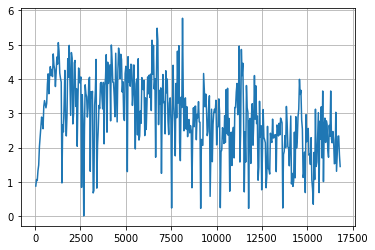

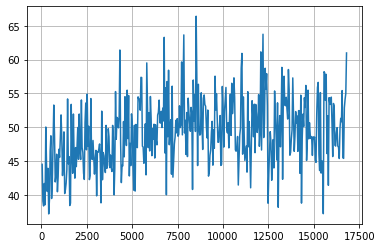

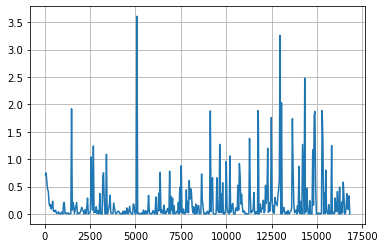

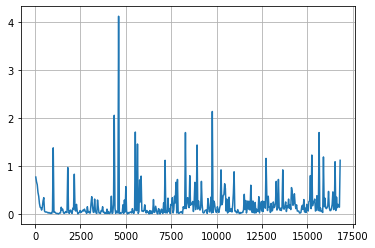

In [0]:
#Now do the actual plots
import matplotlib.pyplot as plt

plt.figure(0)
plt.plot(combEpoch,G_GAN)
plt.grid()

plt.figure(1)
plt.plot(combEpoch,G_loss)
plt.grid()

plt.figure(2)
plt.plot(combEpoch,D_real)
plt.grid()

plt.figure(3)
plt.plot(combEpoch,D_fake)
plt.grid()


# Testing

-   `python test.py --dataroot ./datasets/facades --direction BtoA --model pix2pix --name facades_pix2pix`

Change the `--dataroot`, `--name`, and `--direction` to be consistent with your trained model's configuration and how you want to transform images.

> from https://github.com/junyanz/pytorch-CycleGAN-and-pix2pix:
> Note that we specified --direction BtoA as Facades dataset's A to B direction is photos to labels.

> If you would like to apply a pre-trained model to a collection of input images (rather than image pairs), please use --model test option. See ./scripts/test_single.sh for how to apply a model to Facade label maps (stored in the directory facades/testB).

> See a list of currently available models at ./scripts/download_pix2pix_model.sh

In [0]:
!ls checkpoints/greyGoal_1


10_net_D.pth  20_net_G.pth  35_net_D.pth  45_net_G.pth	    loss_log.txt
10_net_G.pth  25_net_D.pth  35_net_G.pth  5_net_D.pth	    train_opt.txt
15_net_D.pth  25_net_G.pth  40_net_D.pth  5_net_G.pth	    web
15_net_G.pth  30_net_D.pth  40_net_G.pth  latest_net_D.pth
20_net_D.pth  30_net_G.pth  45_net_D.pth  latest_net_G.pth


In [0]:
!python test.py --dataroot ./path/to/data/ --name greyGoal_1 --model pix2pix --batch_size=8 --direction AtoB 


----------------- Options ---------------
             aspect_ratio: 1.0                           
               batch_size: 8                             	[default: 1]
          checkpoints_dir: ./checkpoints                 
                crop_size: 256                           
                 dataroot: ./path/to/data/               	[default: None]
             dataset_mode: aligned                       
                direction: AtoB                          
          display_winsize: 256                           
                    epoch: latest                        
                     eval: False                         
                  gpu_ids: 0                             
                init_gain: 0.02                          
                init_type: normal                        
                 input_nc: 3                             
                  isTrain: False                         	[default: None]
                load_iter: 0               

In [0]:
!ls results/greyGoal_1/test_latest/images/

25986_fake_B.png  27972_real_B.png  29984_real_A.png  31296_fake_B.png
25986_real_A.png  27982_fake_B.png  29984_real_B.png  31296_real_A.png
25986_real_B.png  27982_real_A.png  30213_fake_B.png  31296_real_B.png
26204_fake_B.png  27982_real_B.png  30213_real_A.png  31322_fake_B.png
26204_real_A.png  28285_fake_B.png  30213_real_B.png  31322_real_A.png
26204_real_B.png  28285_real_A.png  30494_fake_B.png  31322_real_B.png
26465_fake_B.png  28285_real_B.png  30494_real_A.png  31620_fake_B.png
26465_real_A.png  28449_fake_B.png  30494_real_B.png  31620_real_A.png
26465_real_B.png  28449_real_A.png  30504_fake_B.png  31620_real_B.png
26564_fake_B.png  28449_real_B.png  30504_real_A.png  31735_fake_B.png
26564_real_A.png  28452_fake_B.png  30504_real_B.png  31735_real_A.png
26564_real_B.png  28452_real_A.png  30675_fake_B.png  31735_real_B.png
26690_fake_B.png  28452_real_B.png  30675_real_A.png  31749_fake_B.png
26690_real_A.png  28809_fake_B.png  30675_real_B.png  31749_real_A.png
26690_

In [0]:
#Try and save some of the created images to the directory:
testDir = 'results/greyGoal_1/test_latest/images/25986_fake_B.png'
!ls
!ls ..

import cv2
a = cv2.imread(testDir)
print(a.shape)
cv2.imwrite('/content/drive/My Drive/CS231N/testIm2.jpg', a)

checkpoints	docs		 models		README.md	  test.py
CycleGAN.ipynb	environment.yml  options	requirements.txt  train.py
data		imgs		 path		results		  util
datasets	LICENSE		 pix2pix.ipynb	scripts
CS231N-pytorch	drive  sample_data
(256, 256, 3)


True

# Visualize

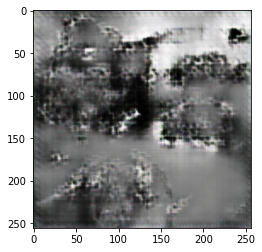

In [0]:
import matplotlib.pyplot as plt

img = plt.imread('results/greyGoal_1/test_latest/images/25986_fake_B.png')
plt.imshow(img)



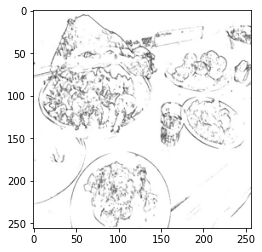

In [0]:
img = plt.imread('results/greyGoal_1/test_latest/images/25986_real_A.png')
plt.imshow(img)

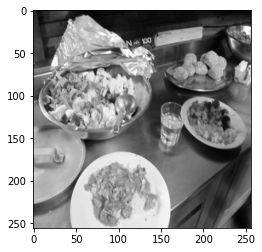

In [0]:
img = plt.imread('results/greyGoal_1/test_latest/images/25986_real_B.png')
plt.imshow(img)